In [294]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd

**Exploring the Data**

As we all know, the Titanic disaster was a real event. All the names in this data set are names of real people and many of them lost their lives when the ship struck an iceberg at around 23:40pm on Sunday, 14 April 1912.

This happened a long time ago, but my heart still goes out to those who suffered and lost their lives during the disaster.

**The Data Frame** 

I start by constructing a Pandas Data Frame:

In [295]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Quick look at the data:

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Ok, so I would definitely drop the 'Cabin' column because of the missing values and probably should drop some more columns that are not very useful for Machine Learning.

For now, I drop 3 columns...

In [297]:
df = df.drop(['Ticket','Cabin', 'Name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


Next, I just want to look at a couple of things so I can have better understanding of who survived the disaster and who didn't survive.

**Survival Distribution Column 'Survived'**

In [298]:
survival_distribution = df.Survived.value_counts()
survival_distribution

0    549
1    342
Name: Survived, dtype: int64

As per the 'Survived' column values, throughout this data frame, the convention in the graphs will be: 
**1 = Survived, 0 = Didn't Survive**.

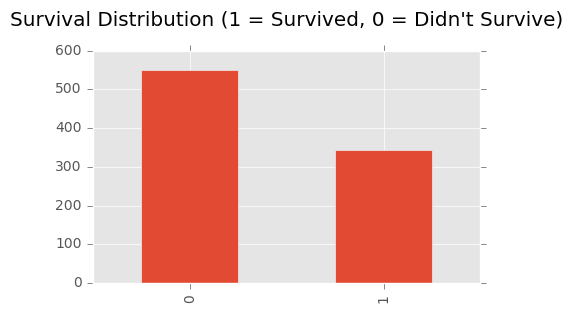

In [299]:
survival_distribution.plot(kind='bar', figsize=(5,3))
plt.title("Survival Distribution (1 = Survived, 0 = Didn't Survive)", y= 1.08)

More people died than survived.


**Survival Distribution by Gender Column 'Sex'**

It's time to look for some patterns. I start by breaking down the survival distribution by gender.

In [300]:
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

(-1, 2)

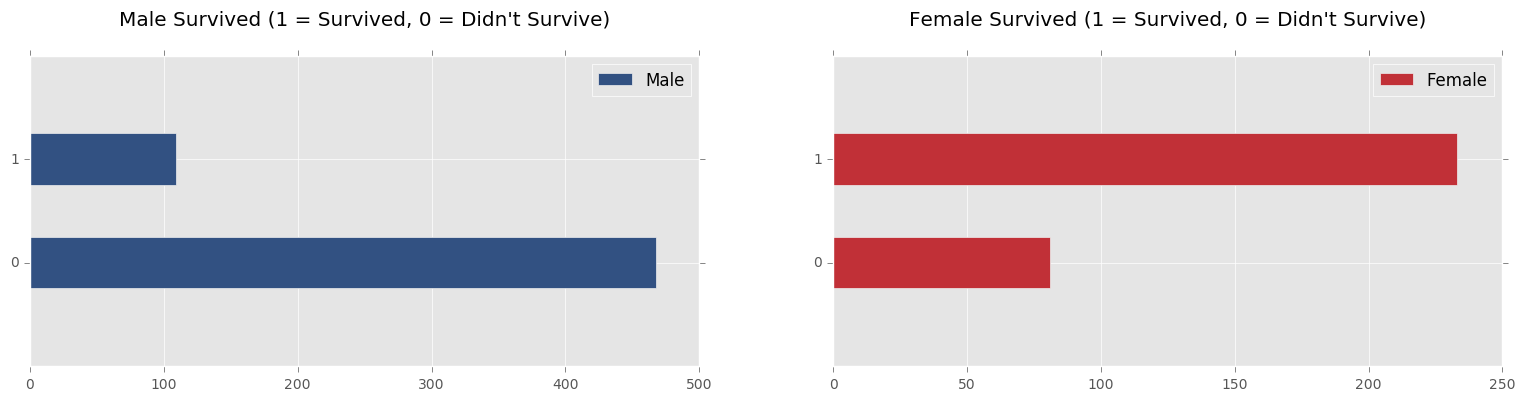

In [301]:
fig = plt.figure(figsize=(19,4))
ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',color='#325182', label='Male')
plt.title("Male Survived (1 = Survived, 0 = Didn't Survive)", y= 1.08); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

ax2 = fig.add_subplot(122)
df_female.plot(kind='barh', color='#c13037',label='Female')
plt.title("Female Survived (1 = Survived, 0 = Didn't Survive)", y= 1.08); plt.legend(loc='best')
ax2.set_ylim(-1, 2)

Clearly, we can see that there were a lot more female survivals than male survivals.

But, I think it will be useful to check the proportions as well, not just the numbers.

In [302]:
survival_proportions_gender = pd.DataFrame({'Male': df_male/float(df_male.sum()), 'Female': df_female/float(df_female.sum())})

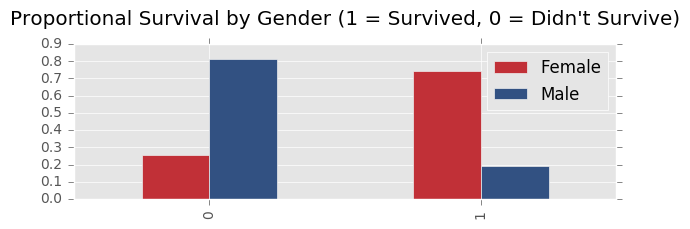

In [303]:
colors = ['#c13037', '#325182']
survival_proportions_gender.plot(kind='bar', color=colors, figsize=(7,2))
plt.title("Proportional Survival by Gender (1 = Survived, 0 = Didn't Survive)", y= 1.08); plt.legend(loc='best')

This is definitely useful info. It's easy to see that, even proportionally, significantly more women survived than men.

**Survival Distribution by Age and Gender Columns 'Age' and 'Sex'**

Next, I want to look at 'Age' column. I will create a new column for 'Age Groups'. Of course, I will drop this column later. 

In [304]:
df['Age Groups'] = pd.cut(df.Age, [0,10,20,30,40,50,60,70,80])

In [305]:
piv = df.pivot_table(index='Age Groups', columns=['Sex', 'Survived'], values = 'Age', aggfunc='count')
piv

Sex        female         male      
Survived        0     1      0     1
Age Groups                          
(0, 10]      12.0  19.0   14.0  19.0
(10, 20]     12.0  34.0   59.0  10.0
(20, 30]     20.0  61.0  126.0  23.0
(30, 40]      9.0  46.0   77.0  23.0
(40, 50]     10.0  21.0   43.0  12.0
(50, 60]      1.0  13.0   24.0   4.0
(60, 70]      NaN   3.0   13.0   1.0
(70, 80]      NaN   NaN    4.0   1.0

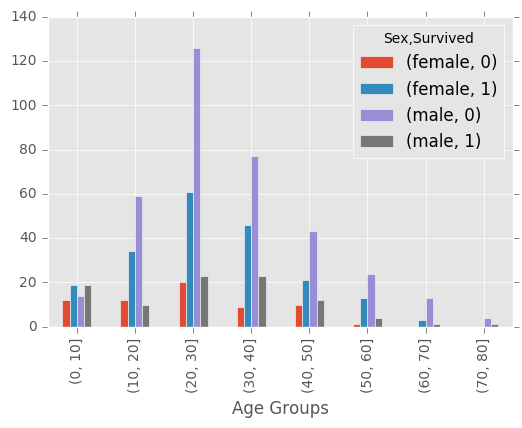

In [306]:
piv.plot(kind='bar')

The Survival Distribution by Age and Gender provided more useful information.


**Survival Distribution by Class Column 'Pclass'**

Next, I explore at the 'Pclass' column the same way I explored the 'Sex' column.

In [307]:
by_class = df.groupby('Pclass')['Survived'].value_counts()
by_class

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

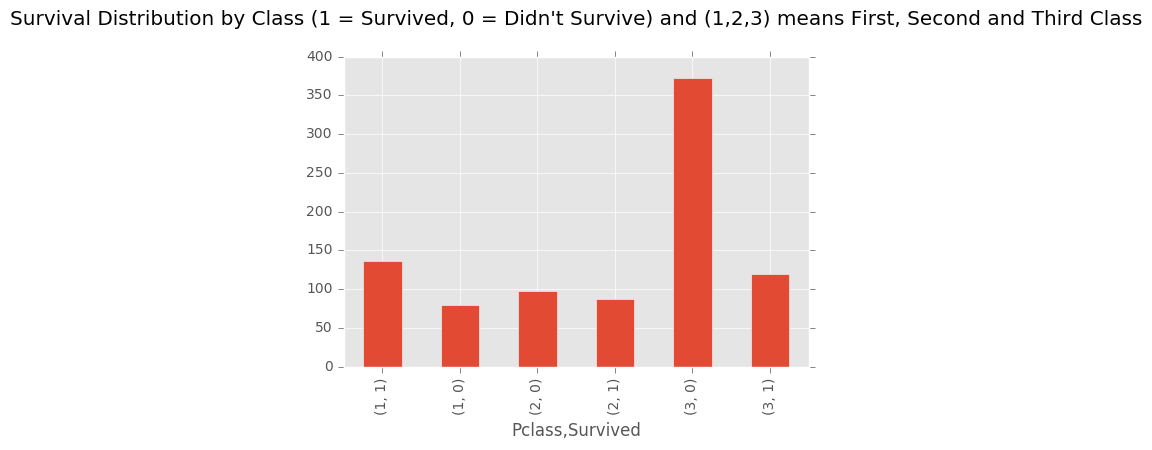

In [308]:
by_class.plot(kind='bar')
plt.title("Survival Distribution by Class (1 = Survived, 0 = Didn't Survive) and (1,2,3) means First, Second and Third Class", y= 1.08)

In [309]:
df_first_class = df.Survived[df.Pclass == 1].value_counts().sort_index()
df_second_class = df.Survived[df.Pclass == 2].value_counts().sort_index()
df_third_class = df.Survived[df.Pclass == 3].value_counts().sort_index()

In [310]:
survival_proportions_class = pd.DataFrame({'First Class': df_first_class / float(df_first_class.sum()), 'Second Class': df_second_class / float(df_second_class.sum()), 'Third Class': df_third_class / float(df_third_class.sum())})

In [311]:
survival_proportions_class

,First Class,Second Class,Third Class
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


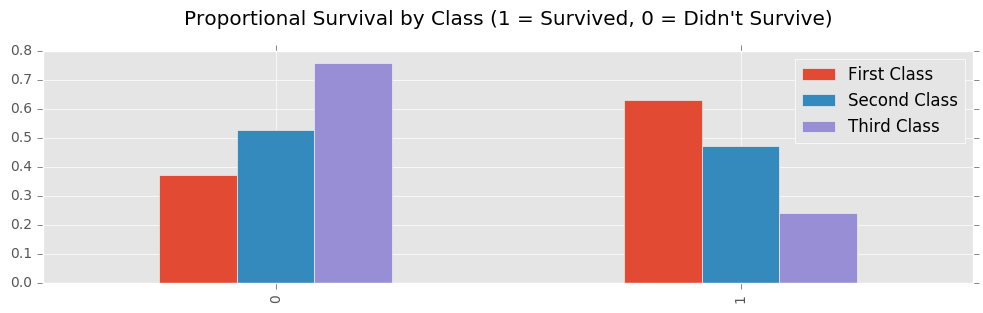

In [312]:
survival_proportions_class.plot(kind='bar',figsize=(12,3))
plt.title("Proportional Survival by Class (1 = Survived, 0 = Didn't Survive)", y= 1.08); plt.legend(loc='best')

There is clearly a pattern here in the 'Pclass' column as well. But, I still want to check the Age Distribution within each class.



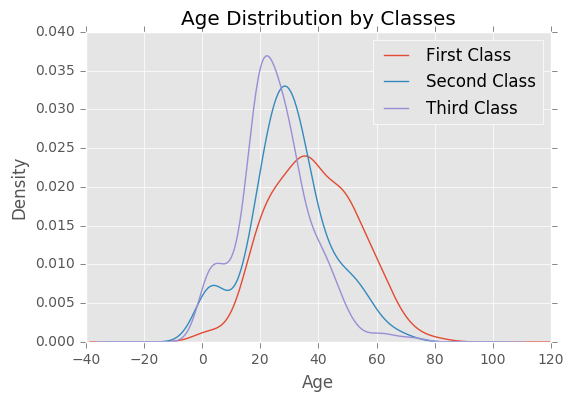

In [313]:
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution by Classes")

plt.legend(('First Class', 'Second Class','Third Class'),loc='best') 

**Survival Distribution by Fare Column 'Fare'**

Next, I think I should explore the 'Fare' column. I will have to create Fare categories (ranges), the same way I did with the 'Age' column. Otherwise, it will be difficult to find any useful info in this column.

In [314]:
by_fare = df.groupby('Fare')['Survived'].value_counts()

In [315]:
df['Fare Groups'] = pd.cut(df.Fare, [0,50,100,150,200,550])

In [316]:
piv_fare = df.pivot_table(index='Fare Groups', columns='Survived', values = 'Fare', aggfunc='count')
piv_fare

Survived,0,1
Fare Groups,,
"(0, 50]",484,232
"(50, 100]",37,70
"(100, 150]",5,19
"(150, 200]",3,6
"(200, 550]",6,14


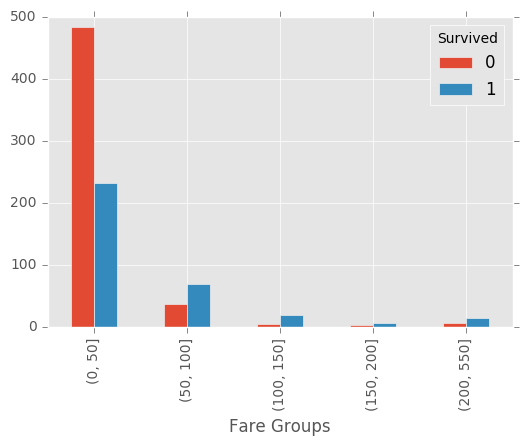

In [317]:
piv_fare.plot(kind='bar')

Well, this definitely looks like an other pattern. It seems, those who had the cheapest tickets (0 to 50) had the lowest chance of survival. In fact, (0 to 50) is the only fare range where the chance to die is higher than the chance to survive. Not just higher, but significantly higher.

**Siblings/Spouses Distribution Column 'SibSp'**

I will check if there is any correlation between the chance of survival and the number of Siblings/Spouses a passenger had. 

In [318]:
SibSp_groupped = df.groupby(['Survived'])['SibSp'].value_counts()
SibSp_groupped

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: SibSp, dtype: int64

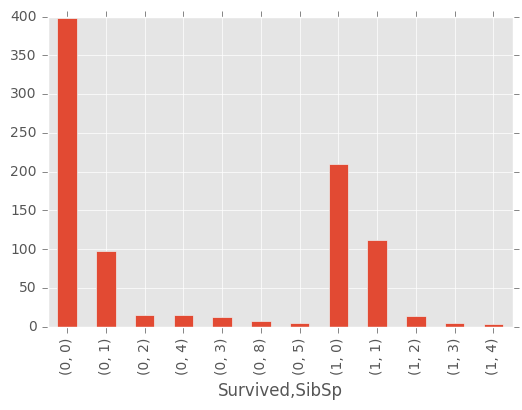

In [319]:
SibSp_groupped.plot(kind='bar')

Apparently, there seems to be some correlation. 

It seems, the correlation is only significant in the group without any siblings or spouses. They had a much lower chance of survival. But, we can also notice that there are no passengers that have survived with 5 or 8 siblings/spouses.

**Parents/Children Distribution Column 'Parch'**

Next, I will perform the same groupby function on this column as I did with SibSp. The result shows that passengers with no parents and no children on board were less likely to survive.

There were very few people with more then 3 parents and/or children.

In [320]:
Parch_groupped = df.groupby(['Survived'])['Parch'].value_counts()
Parch_groupped

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64

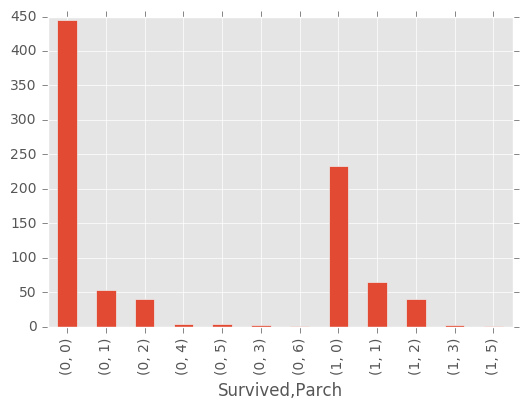

In [321]:
Parch_groupped.plot(kind='bar')